Consider a random variable X with values in:

$$ A_X = \big \{ x_1, . . ., x_8 \big \} $$

and probability mass function

$$PX = \bigg \{ \dfrac{1}{4},\dfrac{1}{4},\dfrac{1}{4},\dfrac{3}{16},\dfrac{1}{64},\dfrac{1}{64},\dfrac{1}{64}, \dfrac{1}{64} \bigg \}$$

* What is the information content of each outcome $x_i$?

* What is the entropy of the distribution?

* Draw a binary probability tree for X. For each node, write the corresponding envent; 
for each edge, write the corresponding conditional probability
* Plot the essential bit content $H_{\delta}(X)$ as a function of the error $\delta$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
np.log2(2)

1.0

In [4]:
prob = np.array([1/4, 1/4, 1/4, 3/16, 1/64, 1/64, 1/64, 1/64])
def new_func(p):
    return -np.log2(p)

info_content = new_func(prob)
print("the information content for each outcome is",info_content)

the information content for each outcome is [2.        2.        2.        2.4150375 6.        6.        6.
 6.       ]


In [5]:
#Checking if the probabilities are normalized to 1
np.sum(prob)

1.0

In [6]:
H = -np.sum(prob * np.log2(prob))

err_1 = np.sqrt( np.sum( ((np.log2(np.e*prob))**2 * prob * (1 - prob))/8))

print('The entropy of the distribution is: %2.4f ± %2.4f'  %(H, err_1)) 

The entropy of the distribution is: 2.3278 ± 0.4467


In [7]:
print(prob)
cum_prob = np.cumsum(prob[::-1])

[0.25     0.25     0.25     0.1875   0.015625 0.015625 0.015625 0.015625]


Recall that the essential bit content $H_d$ is: $ H_d = log_2 (|S_d[x]|)$, 
where $S_d$ is the set of the outcomes in which, with the increasing of $\delta$, we are taking out the less and less probable events \
Cardinality is actually the length of the set

In [8]:
delta = cum_prob
H_d = [np.log2(len(delta) - i ) for i in range(len(delta))]

Text(0, 0.5, 'H_d')

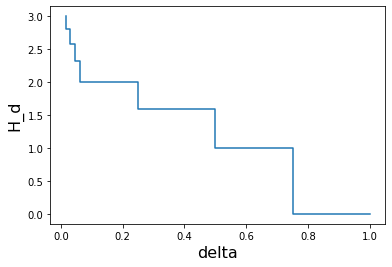

In [9]:
plt.step(delta,H_d)
plt.xlabel("delta",fontsize=16)
plt.ylabel("H_d",fontsize=16)

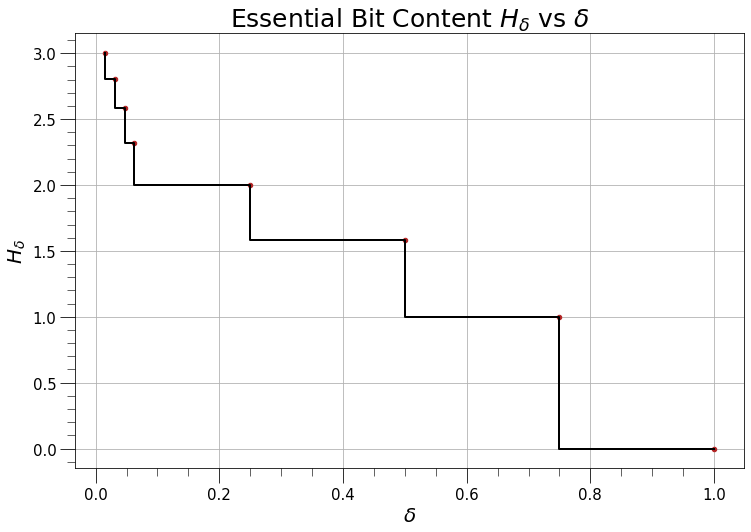

In [10]:
fig , ax = plt.subplots(figsize=(12,8))

ax.step(delta, H_d, where = 'pre', color = 'black', linewidth = 2, zorder = 2)
ax.scatter(delta, H_d, color = 'firebrick', s = 20, zorder = 2)


ax.set_title('Essential Bit Content $H_{\\delta}$ vs $\\delta$', fontsize = 25)    
ax.set_xlabel('$\\delta$', fontsize = 20)
ax.set_ylabel('$H_{\\delta}$', fontsize = 20)         

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

## Second part

Consider $X^{(3)} = X × X × X $ :

* What is the entropy of $X^{(3)}$?
* Plot $H_{\delta}(X^{(3)})$ as a function of $\delta$
* How many binary strings we need to represent $X^{(3)}$ if we allow an error of
1%?


In totale $X^{(3)}$ contiene $8^3 = 512$ elementi, cioè 512 probabilità che sono tutte le combinazioni possibili tra i valori di prob.

In [11]:
a=np.array((1,2))
b=np.array((3,4))
c=np.array((5,6))

ab,bc,ca, = np.meshgrid(a,b,c)
# print(ab, "\n then\n",bc, "\n then\n",ca)
(ab*bc*ca).flatten

<function ndarray.flatten>

In [12]:
prob

array([0.25    , 0.25    , 0.25    , 0.1875  , 0.015625, 0.015625,
       0.015625, 0.015625])

In [13]:
x, y, z = np.meshgrid(prob, prob, prob)
print(len(x))
print(len(x[1]))
#con meshgrid abbiamo creato 3 array (array di liste).
#ogni array ha dimensione 8 (=len di prob) cioè contiene 8 liste
#le liste contengono 8 elementi
#è come aver costruito una matrice 8x8 
x.shape

8
8


(8, 8, 8)

In [14]:
all_prob = x*y*z #facciamo un prodotto di matrici
print(all_prob.shape)
all_prob =all_prob.flatten()
len(all_prob)

(8, 8, 8)


512

In [15]:
H_all = -np.sum(all_prob * np.log2(all_prob))

err_2 = np.sqrt( np.sum((np.log2(np.e*all_prob))**2 * all_prob * (1 - all_prob)) /512)


print('The Shannon Entropy of the text is:  H = %2.4f ± %2.4f'  %(H_all, err_2)  )

The Shannon Entropy of the text is:  H = 6.9835 ± 0.2547


In [16]:
delta_all = np.cumsum(np.sort(all_prob))
 
H_d_all = [np.log2(len(delta_all) - i ) for i in range(len(delta_all))]

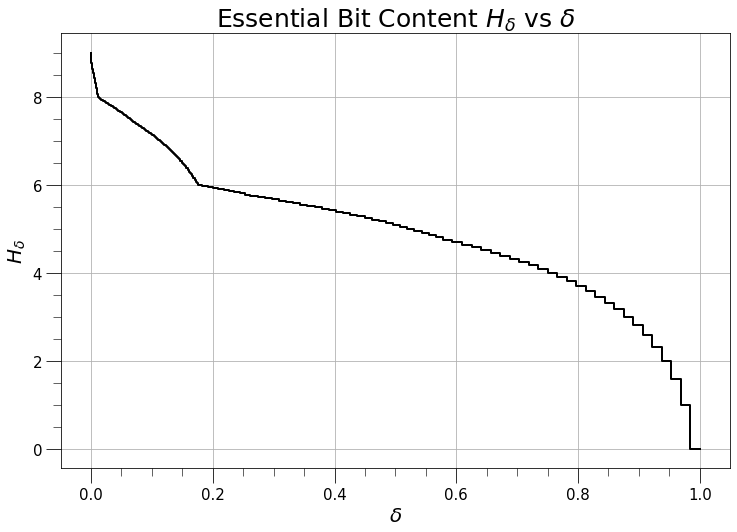

In [17]:
fig , ax = plt.subplots(figsize=(12,8))

ax.step(delta_all, H_d_all, where = 'pre', color = 'black', linewidth = 2, zorder = 2)

ax.set_title('Essential Bit Content $H_{\\delta}$ vs $\\delta$', fontsize = 25)    
ax.set_xlabel('$\\delta$', fontsize = 20)
ax.set_ylabel('$H_{\\delta}$', fontsize = 20)         

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

Caso in cui $\delta=1$%. Ci chiede il bit content del caso in cui delta è 1%, cioè il log della cardinalità di S_delta.

In [25]:
len_S_delta = len(delta_all[delta_all < 1/100])
bits = np.ceil(np.log2(len_S_delta))

print('If we allow an error of 1 %% to represent X(3) we need %1.0f binary strings' %bits)

If we allow an error of 1 % to represent X(3) we need 8 binary strings
